## Aram Data and Analysis

In [904]:
# imports
from IPython.core.display import display

import league_data
import league_constants
import league_functions
import seaborn as sns
import importlib
importlib.reload(league_functions)
importlib.reload(league_constants)
importlib.reload(league_data)
from league_functions import *
from league_data import *
from league_constants import *

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

#### TODO
-finish fuctions
<br> -new function ideas


#### Load Data

In [905]:
query = robb

In [906]:
friends = friends - {query}
df = load_fetch_data(query)

DATA LOADED 3156
NO DATA ADDED



In [907]:
champs = pd.Series(cass.get_champions(region="NA"))
champs.index = champs.apply(lambda x: x.name)
champs = champs.apply(lambda x: x.tags[0])
champs["Teemo"] = "Mage"
champs["Graves"] = "Fighter"
champs["Kayle"] = "Marksman"
champs["Dr. Mundo"] = "Tank"

adc = set(champs[champs.apply(lambda x: "Marksman" in x)].index)
assassin = set(champs[champs.apply(lambda x: "Assassin" in x)].index)
fighter = set(champs[champs.apply(lambda x: "Fighter" in x)].index)
support = set(champs[champs.apply(lambda x: "Support" in x)].index)
tank = set(champs[champs.apply(lambda x: "Tank" in x)].index)
mage = set(champs[champs.apply(lambda x: "Mage" in x)].index)

item_id_to_name = {item.id: item.name for item in cass.core.staticdata.Items(region="NA", version="11.5.1")}



#### Clean data

In [908]:
df.duration = df.duration.astype('timedelta64[s]')
df.id = pd.to_numeric(df.id)
df.creation = pd.to_datetime(df.creation.apply(lambda x:str(x.to('US/Eastern').format())))
df.surrender = df.surrender.astype('bool')
df["opp"] = df.where(df.side == 0).red.fillna(df.where(df.side == 1).blue)
df["side"] = df.where(df.side == 1).red.fillna(df.where(df.side == 0).blue)
df["teamnames"] = df.side.apply(lambda x: {i.name for i in x})
df["teamcomp"] = df.side.apply(lambda x: {i.champ for i in x})
df["enemynames"] = df.opp.apply(lambda x: {i.name for i in x})
df["enemycomp"] = df.opp.apply(lambda x: {i.champ for i in x})
df["champ"] = df.side.apply(lambda x: x[0].champ)
df["win"] = df.summoner.apply(lambda x: x.stats.win)
df = df.sort_values(by="creation", ascending=False)
df = df.set_index("id")

df.drop("side", axis=1, inplace=True)
df.drop("opp", axis=1, inplace=True)

df.head(1)

,duration,patch,creation,surrender,blue,red,summoner,teamnames,teamcomp,enemynames,enemycomp,champ,win
id,,,,,,,,,,,,,
3991499929,1032.0,11.15,2021-07-27 15:09:56-04:00,True,"[(Dirty Doughnut, Camille), (ARAMatureMILF, As...","[(ybccolby, Draven), (2Sdragon, Leona), (Final...",summoner_spell_d: Mark\nsummoner_spell_f: Flas...,"{Dirty Doughnut, Shadowry, Consolation, ARAMat...","{Galio, Ashe, Kayle, Camille, Jax}","{ofc2000alex, Finaleslight, Xeno Snippy, ybcco...","{Draven, Jhin, Leona, Heimerdinger, Bard}",Camille,True


In [909]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3156 entries, 3991499929 to 3095347699
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   duration    3156 non-null   float64
 1   patch       3156 non-null   object 
 2   creation    3156 non-null   object 
 3   surrender   3156 non-null   bool   
 4   blue        3156 non-null   object 
 5   red         3156 non-null   object 
 6   summoner    3156 non-null   object 
 7   teamnames   3156 non-null   object 
 8   teamcomp    3156 non-null   object 
 9   enemynames  3156 non-null   object 
 10  enemycomp   3156 non-null   object 
 11  champ       3156 non-null   object 
 12  win         3156 non-null   bool   
dtypes: bool(2), float64(1), object(10)
memory usage: 302.0+ KB


#### Filter

In [910]:
import math
all = df
df = df[df.patch.apply(lambda x: x.major == "11")]
len(df)

666

In [911]:
solo = df[df.teamnames.apply(lambda x: len(x & friends.difference(set(query))) == 0)]
premade = df[df.teamnames.apply(lambda x: len(x & friends.difference(set(query))) != 0)]

all_solo = all[all.teamnames.apply(lambda x: len(x & friends.difference(set(query))) == 0)]

In [912]:
wr(df)

Win     52.9% 352
Loss    47.1% 314
Name: win, dtype: object

In [913]:
wr(solo)

Win     52.9% 240
Loss    47.1% 214
Name: win, dtype: object

In [914]:
wr(premade)

Win     52.8% 112
Loss    47.2% 100
Name: win, dtype: object

In [915]:
w = wl(df, filter=4)
w

,wins,losses,total,wr
Camille,9,2.0,11.0,82.0
Caitlyn,4,1.0,5.0,80.0
Aphelios,4,1.0,5.0,80.0
Blitzcrank,10,3.0,13.0,77.0
Malzahar,5,2.0,7.0,71.0
...,...,...,...,...
Urgot,2,6.0,8.0,25.0
Illaoi,1,4.0,5.0,20.0
Senna,1,4.0,5.0,20.0
Mordekaiser,1,5.0,6.0,17.0


In [916]:
w.loc["Alistar"]

wins       9.0
losses     6.0
total     15.0
wr        60.0
Name: Alistar, dtype: float64

In [917]:
adc_games = df[df.teamcomp.apply(lambda x: len(x & adc) != 0)]
no_adc_games = df[df.teamcomp.apply(lambda x: len(x & adc) == 0)]

In [918]:
wr(adc_games)

Win     55.5% 307
Loss    44.5% 246
Name: win, dtype: object

In [919]:
wr(no_adc_games)

Win     39.8% 45
Loss    60.2% 68
Name: win, dtype: object

#### Win Time distribution

<AxesSubplot:xlabel='duration', ylabel='Count'>

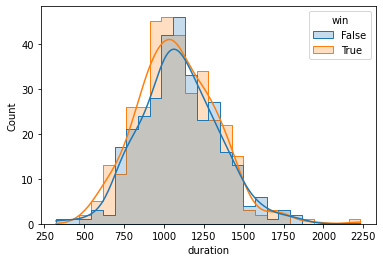

In [920]:
sns.histplot(df[["duration","win"]], x="duration", hue="win", element="step",kde=True)

In [921]:
df[df.win == True].duration.describe().drop(["count","25%","50%","75%"]).apply(lambda x: str(int(x // 60))+"m "+str(int(x%60))+"s")

mean     18m 1s
std      4m 11s
min      8m 18s
max     37m 12s
Name: duration, dtype: object

#### Loss Time distribution

In [922]:
df[df.win == False].duration.describe().drop(["count","25%","50%","75%"]).apply(lambda x: str(int(x // 60))+"m "+str(int(x%60))+"s")

mean    18m 15s
std       4m 4s
min      5m 23s
max     30m 51s
Name: duration, dtype: object

In [923]:
from collections import Counter

Counter(solo.teamnames.apply(list).sum() + solo.enemynames.apply(list).sum()).most_common()[:75]

[('Dirty Doughnut', 454),
 ('hide above bush1', 12),
 ('Philosophyz', 11),
 ('fruittartare', 10),
 ('Angela 77', 10),
 ('Mvp25666666', 9),
 ('Welchs Berries', 9),
 ('Torpedo Torpedo', 9),
 ('Keun', 8),
 ('rockingBanana', 8),
 ('Amedrash', 8),
 ('xRedNinjax', 7),
 ('Hhyhaiziqii', 7),
 ('MarlboroLight', 7),
 ('unlisted track', 7),
 ('xProlific', 7),
 ('quiexent', 7),
 ('Hayleod', 7),
 ('hy Gong Ju', 6),
 ('im freeeeeeeeeee', 6),
 ('Superfanboyz', 6),
 ('Zxse', 6),
 ('IoTitan', 6),
 ('Iceyyying', 6),
 ('theninjapikachu', 6),
 ('Ammorlol', 6),
 ('NaabinDirty', 6),
 ('cloudlightfellow', 6),
 ('Sem3nSpreader', 6),
 ('CeeJaay', 6),
 ('Sháme', 6),
 ('father relax', 6),
 ('MeowfulofHeals', 5),
 ('time wiII tell', 5),
 ('sona1', 5),
 ('Pewcastle', 5),
 ('Stable Old Dog', 5),
 ('Graxter', 5),
 ('Saebom', 5),
 ('crunhy18', 5),
 ('Lt Jello', 5),
 ('Cho Seungyoun', 5),
 ('Horny Goth GF', 5),
 ('WAN GE JB', 5),
 ('tutouguai', 5),
 ('Mohamed Sela', 5),
 ('kevinisgud', 5),
 ('Parhuam', 5),
 ('zlsyerc',

In [924]:
max_wr = 0
gamer = ""
for i in champs.index:
    curr, games = wr(df[df.teamcomp.apply(lambda x: i in x)]).Win.split()
    if int(games) > 10 and float(curr[:-1]) > max_wr:
        max_wr = float(curr[:-1])
        total = games
        gamer = i
print(f'{gamer}, wr: {max_wr}% in {total} games')

Alistar, wr: 75.8% in 25 games


In [925]:

wr, chart = role_distribution(df, champs)
display(wr)
display(chart)

role
Assassin    40.00
Fighter     52.42
Mage        52.08
Marksman    54.67
Support     50.00
Tank        56.14
Name: win, dtype: float64

In [926]:
surr = df.surrender.value_counts()
str(round(surr[True] / surr.sum() * 100, 2)) + '%'

'6.46%'

In [927]:
surr_lose = df[df.win == False].surrender.value_counts()
str(round(surr_lose[True] / surr_lose.sum() * 100, 2)) + '%'

'6.05%'

In [928]:
surr_win = df[df.win == True].surrender.value_counts()
str(round(surr_win[True] / surr_win.sum() * 100, 2)) + '%'

'6.82%'

In [929]:
game_in_timeframe(all)

,sum,count
date,,
2019-11-25,9h 7m,30
2020-12-07,7h 38m,26
2020-12-15,6h 52m,22


In [930]:
game_in_timeframe(all_solo)

,sum,count
date,,
2020-12-07,7h 38m,26
2021-06-05,6h 8m,20
2020-12-16,5h 14m,16


In [931]:
game_in_timeframe(all, timeframe="Month")

,sum,count
date,,
"(2, 2020)",95h 21m,294
"(1, 2020)",90h 59m,280
"(11, 2020)",87h 39m,280


In [932]:
game_in_timeframe(all_solo, timeframe="Month")

,sum,count
date,,
"(7, 2021)",62h 23m,215
"(12, 2020)",61h 28m,203
"(11, 2020)",57h 1m,183


In [933]:
start, end = games_in_days(all_solo, days=7)
wr(all.iloc[start:end-1])

85 games in range of 6 days, 23:46:58 on 07-15-2021


TypeError: 'Series' object is not callable

In [ ]:
all["maj"] =  all.patch.apply(lambda x: int(x.major))
all["min"] =  all.patch.apply(lambda x: int(x.minor))

pp = pd.DataFrame(all.groupby(["maj","min"]).apply(wr))
show = pp[pp.apply(lambda x: int(x.Win[x.Win.find(" "):]) + int(x.Loss[x.Loss.find(" "):]) >= 20, axis=1)]
all.drop(["maj","min"], axis=1, inplace=True)
show


In [ ]:

max_kills(all)

In [ ]:

max_kills_permin(df)

In [ ]:
sums_count(df)

In [ ]:

item_count(df, item_id_to_name, show=30)



In [ ]:

# win_rate(data)
# champ_winrate(data)
# champ_kda(robb, Aram_Data)
# kda(Aram_Data)
# kp(Aram_Data)
# common_teammates(Aram_Data)
# multikills(Aram_Data)
# items(Aram_Data)
# adc_winrate(data)
# time_played(Aram_Data)
# win_rate_with(thomas, Aram_Data)
# time_distribution(robb, data)